In [3]:
# uses bs4 as a dummy package name; beautiful soup 4 is the most recent version
from urllib.request import urlopen
from bs4 import BeautifulSoup

# specify the url
quote_page = "https://www.tumblr.com/search/cats"

# urlopen: queries the website, returns the html to the variable ‘page’
page = urlopen(quote_page)

# parse the html using beautiful soup and store in variable `soup`
soup = BeautifulSoup(page, "html.parser") # <- function of the module, creatures more readable html code

# Take out the <div> of name and get its value
name_box = soup.findAll("div", {"class": "post_body"}) # searches for first occurrence of HTML tag

postlist = []

# name = name_box.strip() # strip() is used to remove starting and trailing
# name_box.text returns only text within HTML tags without the tags
for x in name_box:
    postlist.append(x.text)

print(postlist)

['bloop ', 'By\xa0Pet Foolery ', '(Source) ', 'Cats in windows 🐈 ', 'R.I.P. Grumpy Cat a.k.a. Tardar Sauce! You will be missed by many!  ', 'RIP Grumpy Cat ', 'The monster truck of cats Source: niqdisaster on catpictures. ', '“Cat rolled in edible glitter and looks like a Galaxy”Source ', ' ', ' ', '“This is how they sleep every night.“(Source) ', 'Cat ParkourBy\xa0Urban Feline Ⓡ ', '\n ', '😼😼 ', 'A pixelated cat ', '\n ', '\n ', '\nMy sweet cat child is very cute but not very bright 🤷\u200d♀️ ']


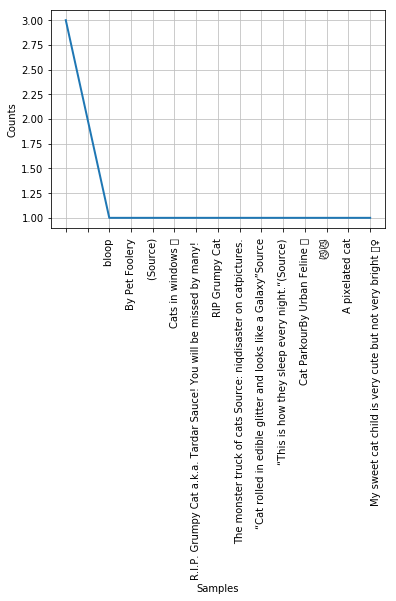

In [4]:
import nltk
freq = nltk.FreqDist(t for t in postlist)
freq.plot(20, cumulative=False)

In [3]:
from selenium import webdriver
import time

driver = webdriver.Chrome('/Users/lionheart/anaconda3/pkgs/chromedriver-binary-2.38-0/bin/chromedriver-binary')
driver.get('https://www.tumblr.com/search/cats')

# Selenium script to scroll to the bottom, wait 5 seconds for the next batch of data to load, then continue scrolling.  It will continue to do this until the page stops loading new data.
lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False
counter = 10
while(match==False or counter > 0):
    lastCount = lenOfPage
    time.sleep(5)
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    if lastCount==lenOfPage:
        match=True
    counter -= 1

# Now that the page is fully scrolled, grab the source code.
source_data = driver.page_source

In [21]:
from bs4 import BeautifulSoup
import string
import nltk

# Throw source into BeautifulSoup and start parsing.
soup = BeautifulSoup(source_data, "html.parser")
    
# Take out the <div> of name and get its value
posts = soup.findAll("div", {"class": "post_body"}) # searches for first occurrence of HTML tag

postwords = []
words = set(nltk.corpus.words.words())

# name = name_box.strip() # strip() is used to remove starting and trailing
# name_box.text returns only text within HTML tags without the tags
for x in posts:
    posttext = x.text.replace('\n','').replace('’','')
    posttext = posttext.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(posttext.lower())
    postwords.extend(tokens)

nlp_sample = []
    
for w in postwords:
    if w in words:
        nlp_sample.append(w)

print(nlp_sample)

['oh', 'he', 'witchy', 'couple', 'commission', 'a', 'happy', 'boy', 'with', 'a', 'huge', 'smile', 'thunder', 'feel', 'the', 'thunder', 'part', 'of', 'entering', 'the', 'and', 'provided', 'by', 'a', 'certain', 'ghost', 'photogenic', 'good', 'boy', 'even', 'in', 'the', 'sun', 'time', 'is', 'a', 'modal', 'sent', 'me', 'of', 'my', 'and', 'it', 'made', 'my', 'day', 'spending', 'my', 'day', 'off', 'doing', 'the', 'my', 'kitten', 'a', 'very', 'bad', 'habit', 'of', 'taking', 'the', 'bottle', 'from', 'the', 'bin', 'and', 'dropping', 'them', 'in', 'my', 'so', 'i', 'am', 'forced', 'to', 'find', 'them', 'in', 'the', 'most', 'inconvenient', 'way', 'possible', 'currently', 'she', 'is', 'hoarding', 'them', 'in', 'my', 'old', 'work', 'boots', 'just', 'out', 'my', 'boot', 'and', 'a', 'bunch', 'of', 'bottle', 'fell', 'out', 'and', 'biscuit', 'is', 'very', 'upset', 'with', 'me', 'for', 'disturbing', 'her', 'precious', 'hoard', 'rainy', 'cat', 'cat', 'this', 'is', 'the', 'drawing', 'seen', 'been', 'feelin

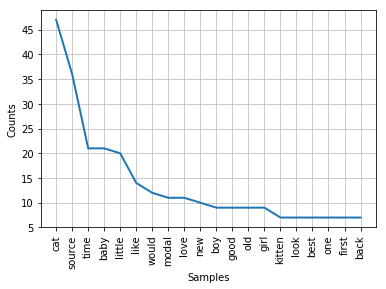

In [22]:
from nltk.corpus import stopwords
sr = stopwords.words('english')
clean_tokens = nlp_sample[:]
for token in nlp_sample:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

freq = nltk.FreqDist(t for t in clean_tokens)
# for key,val in freq.items():
    # print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)